In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Downloads/data.csv')
df.head()

,month,account_id,region,category,spend_level,revenue,live_ad,new_AA,paid_ad,listing_fee,bump_feature,shop_feature,adview_received,adview_per_live_ad_per_day,lead_received,lead_per_live_ad_per_day,spending_per_paid_ads,spending_per_live_ad
0,2020-10-01,7,HN,Car,light,13636,NaN,NaN,1,0,1,0,NaN,NaN,NaN,NaN,13636.000000,NaN
1,2020-11-01,7,HN,Car,light,40909,NaN,NaN,2,0,3,0,NaN,NaN,NaN,NaN,20454.500000,NaN
2,2020-12-01,7,HN,Car,light,272727,6.0,2.0,2,2,2,1,800.0,16.666667,35.0,0.729167,136363.500000,45454.500000
3,2021-01-01,7,HN,Car,light-medium,909091,16.0,11.0,13,8,38,0,9023.0,38.233051,202.0,0.855932,69930.076923,56818.187500
4,2021-02-01,7,HN,Car,medium,1036364,11.0,3.0,6,1,27,1,5132.0,29.664740,76.0,0.439306,172727.333333,94214.909091


Filtering data (April and Oct)

In [3]:
df['month'] = pd.to_datetime(df['month'])
df=df[(df['month'].dt.month >= 4) & (df['month'].dt.month <= 10)]
df.head()

,month,account_id,region,category,spend_level,revenue,live_ad,new_AA,paid_ad,listing_fee,bump_feature,shop_feature,adview_received,adview_per_live_ad_per_day,lead_received,lead_per_live_ad_per_day,spending_per_paid_ads,spending_per_live_ad
0,2020-10-01,7,HN,Car,light,13636,NaN,NaN,1,0,1,0,NaN,NaN,NaN,NaN,13636.000000,NaN
6,2021-04-01,7,HN,Car,medium,1336364,21.0,13.0,19,6,77,0,8634.0,37.376623,137.0,0.593074,70334.947368,63636.380952
7,2021-10-01,7,HN,Car,light,420000,5.0,5.0,5,5,20,0,2128.0,49.488372,34.0,0.790698,84000.000000,84000.000000
12,2022-04-01,7,HN,Car,medium,1224359,29.0,16.0,24,8,62,1,6114.0,15.439394,127.0,0.320707,51014.958333,42219.275862
15,2021-10-01,88,HN,MC,light,95455,11.0,0.0,4,0,7,0,1236.0,4.866142,22.0,0.086614,23863.750000,8677.727273


In [4]:
missing = df.isna().sum()

missing_per = missing/len(df['account_id'])*100
missing_per.sort_values(ascending=False)

lead_per_live_ad_per_day      19.450097
lead_received                 19.450097
adview_per_live_ad_per_day    17.850551
adview_received               17.850551
spending_per_live_ad          17.746439
live_ad                       17.746439
new_AA                        17.746439
spending_per_paid_ads          0.104112
bump_feature                   0.000000
shop_feature                   0.000000
month                          0.000000
account_id                     0.000000
paid_ad                        0.000000
revenue                        0.000000
spend_level                    0.000000
category                       0.000000
region                         0.000000
listing_fee                    0.000000
dtype: float64

#### Average revenue generated by each spend_level

In [5]:
grouped = df.groupby('spend_level')
grouped['revenue'].mean()

spend_level
heavy           5.819091e+06
light           1.434210e+05
light-medium    7.419895e+05
medium          1.395082e+06
medium-heavy    2.453952e+06
Name: revenue, dtype: float64

<AxesSubplot:xlabel='spend_level', ylabel='Count'>

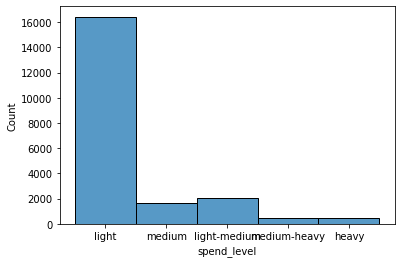

In [6]:
import seaborn as sns

sns.histplot(df['spend_level'])

In [7]:
spend_level = df.groupby('spend_level')
spend_level.revenue.sum().sort_values(ascending=False)

spend_level
heavy           2822259012
light           2355116435
medium          2311650793
light-medium    1541112244
medium-heavy    1204890380
Name: revenue, dtype: int64

### Amount of unique user per spend_level

In [8]:
spend_level['account_id'].nunique()

spend_level
heavy            274
light           8872
light-medium    1517
medium          1105
medium-heavy     363
Name: account_id, dtype: int64

In [9]:
df.groupby(['spend_level', 'account_id']).revenue.sum().sort_values(ascending=False)

spend_level  account_id
heavy        1079050       290669001
             4619917       114267928
             16732          75383132
             720041         53404208
             4229532        48706947
                             ...    
light        12763522              0
             12264257              0
             4910346               0
             12224348              0
             18355677              0
Name: revenue, Length: 12131, dtype: int64

In [18]:
df.corr()

,account_id,revenue,live_ad,new_AA,paid_ad,listing_fee,bump_feature,shop_feature,adview_received,adview_per_live_ad_per_day,lead_received,lead_per_live_ad_per_day,spending_per_paid_ads,spending_per_live_ad
account_id,1.000000,-0.001857,-0.004547,-0.001548,-0.006178,-0.005015,-0.007049,0.018911,-0.001333,-0.044939,0.018537,-0.011498,-0.005762,-0.015460
revenue,-0.001857,1.000000,0.737895,0.712891,0.816040,0.769591,0.643994,0.171102,0.790936,-0.014766,0.601817,-0.045347,0.260592,0.231833
live_ad,-0.004547,0.737895,1.000000,0.970845,0.936712,0.941458,0.108145,0.024723,0.663389,-0.033946,0.416981,-0.022315,-0.013403,-0.016832
new_AA,-0.001548,0.712891,0.970845,1.000000,0.912145,0.920923,0.126932,0.028622,0.709514,-0.016457,0.434420,-0.013774,-0.015916,-0.019356
paid_ad,-0.006178,0.816040,0.936712,0.912145,1.000000,0.989491,0.223450,0.043581,0.706880,-0.043053,0.471175,-0.031483,-0.013593,0.007175
listing_fee,-0.005015,0.769591,0.941458,0.920923,0.989491,1.000000,0.135428,0.015609,0.651865,-0.018814,0.398809,-0.014751,-0.016717,0.000143
bump_feature,-0.007049,0.643994,0.108145,0.126932,0.223450,0.135428,1.000000,0.123908,0.588241,-0.005378,0.587260,-0.044299,0.231287,0.255267
shop_feature,0.018911,0.171102,0.024723,0.028622,0.043581,0.015609,0.123908,1.000000,0.083635,-0.089471,0.036692,-0.069855,0.120526,0.048798
adview_received,-0.001333,0.790936,0.663389,0.709514,0.706880,0.651865,0.588241,0.083635,1.000000,0.032543,0.814693,-0.027303,0.082220,0.022171
adview_per_live_ad_per_day,-0.044939,-0.014766,-0.033946,-0.016457,-0.043053,-0.018814,-0.005378,-0.089471,0.032543,1.000000,0.043181,0.635502,0.164748,0.131273
